In [58]:
# Import libraries
import numpy as np
from numpy import linalg as LA
import scipy

import random
import time
from IPython import display
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

import seaborn as sns

## MA934

## Solving linear systems - the direct way

### Backward substitution and LU factorisation

We start with the most basic solver - a backward substitution algorithm for a favourable dataset.

#### Expected input:
U - an nxn upper triangular matrix with non-zero entries on the diagonal <br>
b - an n-sized right hand side

#### Expected output:
x - an n-sized vector, solution to Ux=b 

#### A simple example

Designed for $x_1=5$, $x_2=1$ and $x_3=2$ as target solutions.

In [2]:
# Initialize upper triangular matrix
U0 = np.matrix([[1,2,3],[0,1,1],[0,0,5]])
# Initialize right hand side
b0 = np.matrix([[13],[3],[10]])
# Set the solution vector to zero
x0 = np.zeros_like(b0)

# Naive/direct translation of algorithm
n = b0.size
# First step considered outside loop to avoid 
# iterating index exceeding size of matrix
x0[n-1] = b0[n-1]/U0[n-1, n-1]

# Main loop
for i in range(n-2, -1, -1):
    h = 0 # helper variable
    for j in range (i+1, n):
        h += U0[i, j]*x0[j]
    x0[i] = (b0[i] - h)/U0[i, i]

# Consult result
print(np.matrix(x0))

[[5]
 [1]
 [2]]


#### Primary backward substitution function

More elegantly, we define a function we can use as part of more complicated workflows.

In [3]:
def simpleBackwardSubstitution(U: np.ndarray, b: np.ndarray) -> np.ndarray:
    n = b.size
    x = np.zeros_like(b)
    
    # First step
    x[n-1] = b[n-1]/U[n-1, n-1]
    
    # Main loop
    for i in range(n-2, -1, -1):
        h = 0 # helper variable
        for j in range (i+1, n):
            h += U[i, j]*x[j]
        x[i] = (b[i] - h)/U[i, i]

    return x

#### General solution

First test the function to make sure we retrieve the expected output, then design a larger ($64 \times 64$) matrix for a more realistic test.

In [4]:
# Use a function (defined below) instead and compare results
x0F = simpleBackwardSubstitution(U0,b0);
print("First verify the simple 3x3 case:")
print(np.matrix(x0F))

# Now for a real challenge - a larger upper triangular matrix
# Generate a random 64x64 matrix (the 0.1 offset is to ensure non-zero
# diagonal entries)
A = 0.1 + np.random.rand(64,64)
# Select upper triangular part
U = np.triu(A)
# ... and an appropriately sized vector, either artificially
b = U.sum(axis=1) # expect a solution of 1's if constructing the rhs this way
# b = np.random.rand(len(A),1) # uncomment if you wish to test more generally

x = simpleBackwardSubstitution(A,b)

# Compare result to in-built function
xInbuilt = np.linalg.solve(U, b)
# using Euclidean vector norm
errorNorm = LA.norm(x - xInbuilt)
print("The error norm between our solution and the default solver is ", errorNorm)

First verify the simple 3x3 case:
[[5]
 [1]
 [2]]
The error norm between our solution and the default solver is  2.3555498106971375e-07


### How do we factorise a matrix to retrieve triangular components?


#### Expected input:
A - an nxn matrix with invertible principal sub-matrices <br>

#### Expected output
L - an nxn unit lower triangular matrix <br>
U - an nxn regular upper triangular matrix


Define again a simple test matrix for which we know the desired answer (```testA```) and a larger random counterpart that acts as the primary target once we have convinced ourselves that the implemented algorithm works. (Aside: one simple test is not sufficient of course, and you are of course encouraged to try different examples and special cases before declaring victory.)


In [5]:
# A simple matrix to test out the functionality
testA = np.array([[1, 2, 4], [3, 8, 14], [2, 6, 13]])

# Generate a random matrix of specified size
randomA = np.random.rand(32,32)

#### LU factorisation function

Below is the straightfoward translation of the pseudocode for the standard LU factorisation (without pivoting).

In [6]:
def simpleLU(A,nk):
    
    n = len(A)
    
    # Initialise L and U matrices
    U = A.copy()
    L = np.identity(n)
    
    # Main loop as in the lecture notes pseudocode
    for k in range(nk):   # for full LU factorisation, nk = n (nk added as a variable only for the animation)
        for j in range (k+1,n):
            L[j,k] = U[j,k]/U[k,k]
            U[j,k] = 0
            for i in range(k+1,n):
                U[j,i] = U[j,i] - L[j,k]*U[k,i]  
    return L, U

We now deploy the implemented function for both the simple and the more complex case, while monitoring results and error norms.

In [7]:
# Execute the simple algorithm (defined via previous function)
testL, testU = simpleLU(testA, nk = len(testA))

# The simple results can be inspected visually
print(np.matrix(testL))
print(np.matrix(testU))

# The larger matrix case is simply stored for future verification
randomL, randomU = simpleLU(randomA, nk = len(randomA))

# Verify that the factorisation is indeed accurate
# using a classical 2-norm for the error matrix

# Simple case first
testErrorNorm = LA.norm(testA-testL@testU)
print ("The error norm of the solution when testing against standard multiplication for the simple case is: ", testErrorNorm)

# More complicated case next
randomErrorNorm = LA.norm(randomA-randomL@randomU)
print("The error norm of the solution when testing against standard multiplication for the larger case is: ", randomErrorNorm)

# If we wish to restrict our verification for a specific accuracy level: 
# print ("The error norm of the solution when testing against standard multiplication for the larger case is: ",end="")
# print ("{0:.6f}".format(randomErrorNorm))

# Can also verify the in-built Python functionality for LU via scipy
# tP, tL, tU = lu(testA)
# rP, rL, rU = lu(randomA)

[[1. 0. 0.]
 [3. 1. 0.]
 [2. 1. 1.]]
[[1 2 4]
 [0 2 2]
 [0 0 3]]
The error norm of the solution when testing against standard multiplication for the simple case is:  0.0
The error norm of the solution when testing against standard multiplication for the larger case is:  3.715493885038818e-14


In [8]:
# Required for creating the animation in the LU factorisation below

pip install nodejs

SyntaxError: invalid syntax (3450860566.py, line 3)

## LU factorisation in action (soon in cinemas near you)

<IPython.core.display.Javascript object>


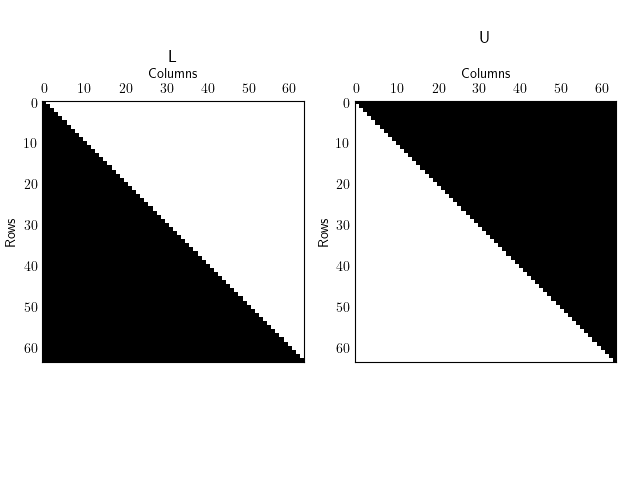

In [9]:
# This solution version (with %matplotlib notebook) works via the Jupyter Notebook
# (rather than JupyterLab) environment. If you are used to working in the latter, 
# a few additional installs are required, see e.g.
# https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab
# for details/solutions.

# Initialize the layout that will be used for animation
%matplotlib notebook

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1,2)
fig.tight_layout()

# matrix size nxn
n=64

# Define A
rndA = np.random.rand(n,n) 

# Initialisation and making the plots nicer
line1 = ax1.spy(np.eye(n))
ax1.set_xlabel('Columns')
ax1.set_ylabel('Rows')
ax1.set_title('L \n',y=10.08)
ax1.tick_params(axis='both', which='both', length=0)
ax1.xaxis.set_label_position('top') 

line2 = ax2.spy(rndA)
ax2.set_xlabel('Columns')
ax2.set_ylabel('Rows')
ax2.set_title('U\n')
ax2.tick_params(axis='both', which='both', length=0)
ax2.xaxis.set_label_position('top') 


# Helper function that updates the L and U matrices and returns a new image of
# the updated L and U. animate is the function that FuncAnimation calls
def animate(frame):
    L,U = simpleLU(rndA,nk=frame) 
    line1 = ax1.spy(L)
    line2 = ax2.spy(U)  
    return line1, line2

# This creates the animation
anim = animation.FuncAnimation(fig, animate, frames=n, 
                                interval=250, repeat = False, blit=True)
plt.show()

**Exercise 1:** using the above functionality, implement and test your very own linear system solver. 

**Exercise 2:** consult subsection $5.2.2$ in the notes and implement Crout's algorithm for LU decomposition using partial pivoting. Construct a suitable example that showcases its capabilities (e.g. in which non-pivoting methods fail).

In [23]:
def myfullpiv(A):
    P = np.eye(len(A))
    inds = np.argmax(A,axis=0)
    print(inds)
    for cols in range(len(A)):
        P[cols,:],P[inds[cols],:]=\
        P[inds[cols],:],P[cols,:]
        inds[cols],inds[inds[cols]]=inds[inds[cols]],inds[cols]
        
    return(P,P@A)

In [24]:
A=np.array([[1,2],[2,0]])
print(A)
myfullpiv(A)

[[1 2]
 [2 0]]
[1 0]


(array([[0., 1.],
        [0., 1.]]),
 array([[2., 0.],
        [2., 0.]]))

In [93]:
def crouts(A):
    tol = 1e-6
    n = len(A)
    L = np.eye(n)
    U = np.zeros((n,n))
    P = np.eye(n)
    for j in range(n): #cols
        # ind = np.argmax(A[j:,j])
        # P[j,:],P[ind+j,:] = P[ind+j,:],P[j,:]
        # A[j,:],A[ind+j,:] = A[ind+j,:],A[j,:]
        for i in range(j+1): #rows
            U[i,j] = A[i,j]-np.dot(L[i,0:i],U[0:i,j])
            # print(i,j,L[i,0:i],U[0:i,j])
            if U[i,j] < tol:
                print("NOOOOO")
                # U[i,j]=0
                # inds = np.argmax(A[i:,j])
                # P[i,:],P[inds+i,:]=P[inds+i,:],P[i,:]
                # A[i,:],A[inds+i,:]=A[inds+i,:],A[i,:]
                # U[i,j] = A[i,j]-np.dot(L[i,0:i],U[0:i,j])
            A[i,j]=U[i,j]
        for i in range(j+1,n):
            L[i,j] = (A[i,j] - np.dot(L[i,0:j],U[0:j,j]))/U[j,j]
            A[i,j] = L[i,j]
    
    return(L,U,P)
                
                

In [98]:
A = np.random.randint(1,213,size=(4,4))
print(A)
L,U,P=crouts(A)
print(L@U)


[[180 190 158  19]
 [200 202  37  75]
 [ 60 133  56  86]
 [152 139 212 186]]
NOOOOO


/home/nvanderriet/anaconda3/envs/envy/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


OverflowError: cannot convert float infinity to integer